In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

In [6]:
def load_dataset(data_dir):
    class_labels = os.listdir(data_dir)
    class_images = {}
    
    for class_label in class_labels:
        class_folder = os.path.join(data_dir, class_label)
        if os.path.isdir(class_folder):
            class_images[class_label] = [os.path.join(class_folder, img) for img in os.listdir(class_folder)]
    
    return class_images

def analyze_class_distribution(class_images):
    class_counts = {class_label: len(images) for class_label, images in class_images.items()}
    class_counts_sorted = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))
    
    print("Class Distribution:")
    for class_label, count in class_counts_sorted.items():
        print(f"{class_label}: {count} images")
    
    total_images = sum(class_counts.values())
    class_percentages = {class_label: (count / total_images) * 100 for class_label, count in class_counts.items()}
    
    labels = class_percentages.keys()
    sizes = class_percentages.values()
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title("Class Distribution in Dataset")
    plt.axis('equal')
    plt.show()
    
    return class_counts_sorted

def display_top_images(class_images, num_images=5):
    for class_label, images in class_images.items():
        selected_images = random.sample(images, num_images)
        print(f"\nTop {num_images} images from class '{class_label}':")
        
        plt.figure(figsize=(15, 15))
        for i, img_path in enumerate(selected_images, 1):
            img = Image.open(img_path)
            plt.subplot(1, num_images, i)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{class_label} - {os.path.basename(img_path)}")
        
        plt.show()

Class Distribution:
paper: 594 images
glass: 501 images
plastic: 482 images
metal: 410 images
cardboard: 403 images
trash: 137 images


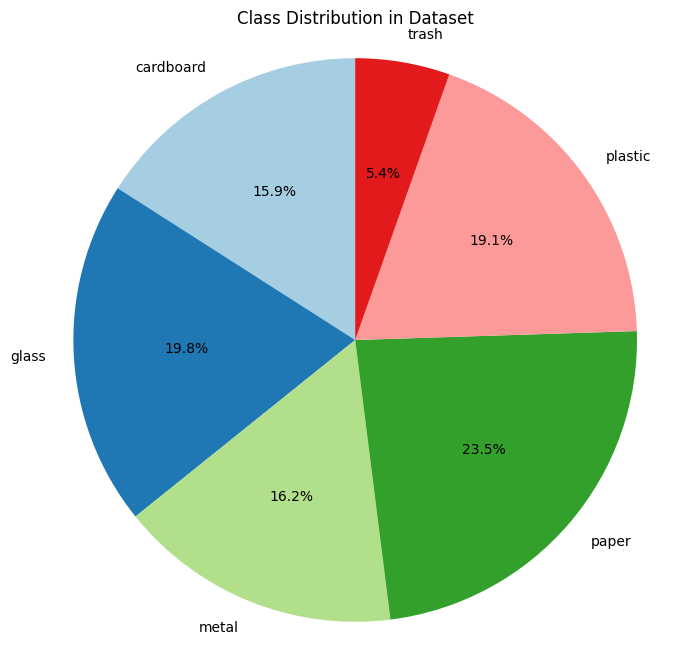


Top 5 images from class 'cardboard':


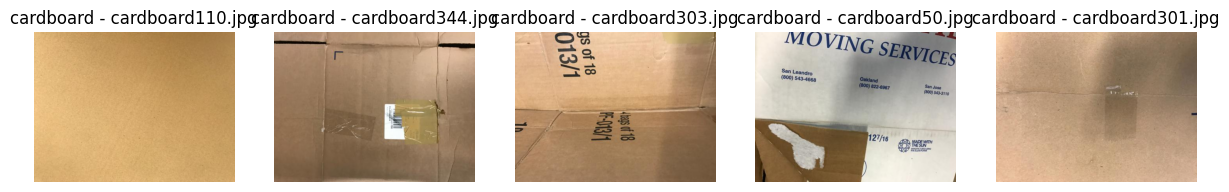


Top 5 images from class 'glass':


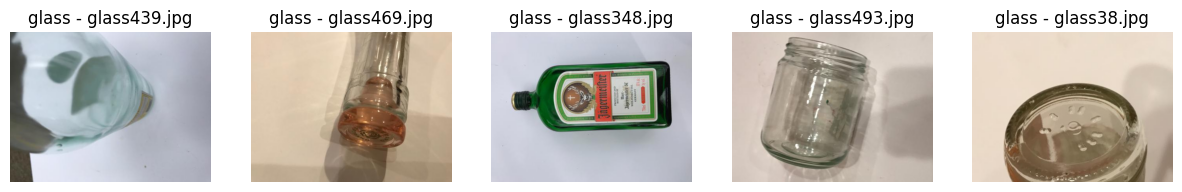


Top 5 images from class 'metal':


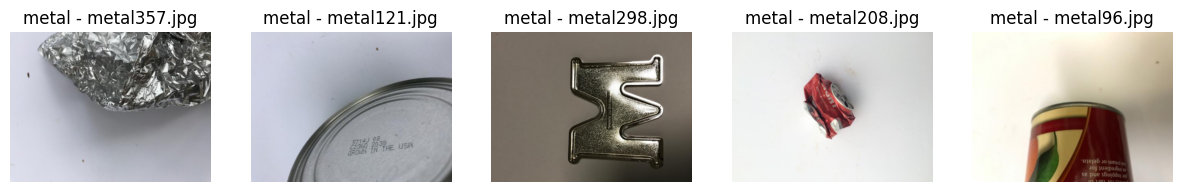


Top 5 images from class 'paper':


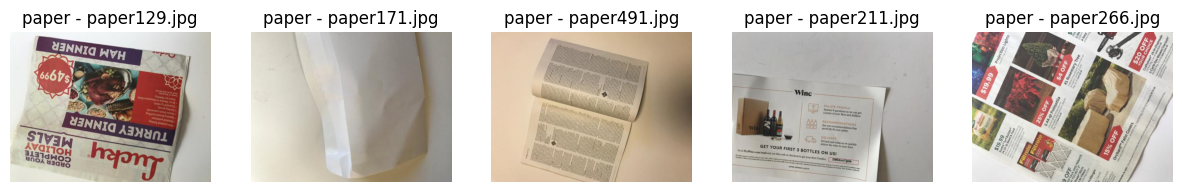


Top 5 images from class 'plastic':


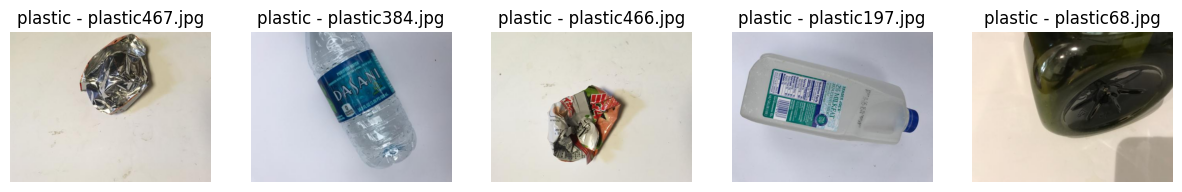


Top 5 images from class 'trash':


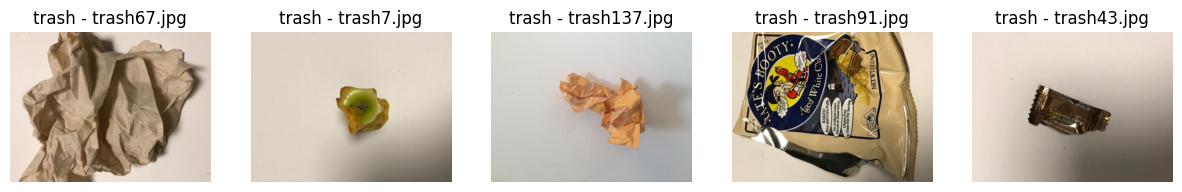

In [7]:
def main():
    data_dir = "garbage_dataset" 
    class_images = load_dataset(data_dir)
    class_counts_sorted = analyze_class_distribution(class_images)
    display_top_images(class_images, num_images=5)

main()

## Analysis of the Results:
- Class Imbalance: the dataset shows significant class imbalance, especially with the trash class, which has only 137 images, compared to the paper class with 594 images.
This imbalance could affect the performance of the model, as the model might be biased toward the more frequent classes (e.g., paper, glass, plastic) and have difficulty correctly predicting the minority class (trash).

- Class Distribution Highlights: paper is the most represented class, with 594 images, followed closely by glass with 501 images. These two classes have a relatively larger number of samples, which should make them easier for the model to learn.
Plastic (482 images), metal (410 images), and cardboard (403 images) have somewhat similar numbers of images and are reasonably well-represented.
Trash (137 images) is the least represented class, and this disparity may lead to poor generalization for this class.

- Potential Issues: the model might underperform for the minority class (trash) due to the large number of samples in the majority classes. the model might predict paper, glass, or plastic more often, simply because they have more examples to learn from.
Overfitting on Majority Classes: With an overabundance of images from classes like paper, glass, and plastic, the model may overfit to these classes, making it harder to generalize on the less-represented ones.

- Steps to Mitigate Imbalance: Data Augmentation: 
we can try to augment the minority class (trash) with transformations like rotation, flipping, zooming, or color adjustments to artificially increase its representation.

There are other several technic, but we will focus by using data augmentation